Success!


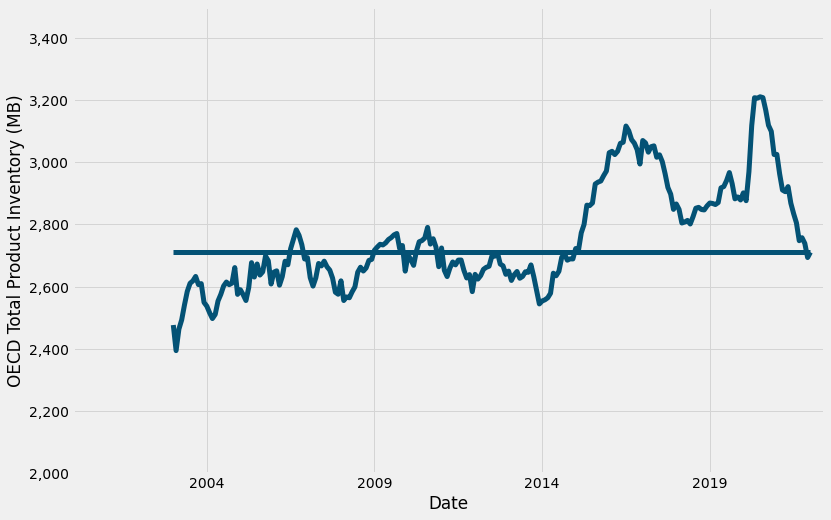

In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker




# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
SERIES_NAMES = ['TOTAL INVENTORY']
# Enter all your Series IDs here separated by commas
SERIES_KEY = ['STEO.PASC_OECD_T3.M']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2000-01-01'
endDate = '2022-01-01'


# Pull in data via EIA API
for i in range(len(SERIES_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + SERIES_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', SERIES_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)



# Combine all the data into one dataframe
crude = pd.concat(final_data, axis=1)
# Create date as datetype datatype
crude['Year'] = crude.index.astype(str).str[:4]
crude['Month'] = crude.index.astype(str).str[4:6]
crude['Day'] = 1
crude['Date'] = pd.to_datetime(crude[['Year','Month','Day']])

crude.set_index('Date',drop=True,inplace=True)
crude.sort_index(inplace=True)
crude = crude[startDate:endDate]
crude = crude.iloc[:,:5]

#crude['TOTAL INVENTORY']=crude['TOTAL INVENTORY']/1000
crude['NEW']=np.ones(len(crude['TOTAL INVENTORY']))*crude['TOTAL INVENTORY'][-1]

# Generating Colours and Style
colors = {'TOTAL_INVENTORY':'#045275','TODAYS LEVEL':'#DC3977'}
plt.style.use('fivethirtyeight')

#fig, ax = plt.subplots()

# Creating the Visualization
plot = crude.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)


plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('OECD Total Product Inventory (MB)')

plot.set_xlim([date(2000,1,1),date(2022,6,1)])
plot.set_ylim([2000,3500])

##
#plot.plot([date(2000,1,1),date(2022,6,1)],[2000000,2000000])

##
pngname='total_inventory_oecd'
plt.savefig('/Users/peter/projects/oil/post/'+pngname)

In [2]:
crude

,TOTAL INVENTORY,Year,Month,Day
Date,,,,
2010-01-01,2701.626000,2010,01,1
2010-02-01,2687.072000,2010,02,1
2010-03-01,2668.572000,2010,03,1
2010-04-01,2714.324000,2010,04,1
2010-05-01,2744.411000,2010,05,1
...,...,...,...,...
2021-09-01,2747.815099,2021,09,1
2021-10-01,2757.368971,2021,10,1
2021-11-01,2739.159437,2021,11,1
